In [ ]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy

# My Tools
from toolkit.tools import print_column_uniques, make_df, get_column_uniques


%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = [12, 7]

In [ ]:
sns.set()
sns.set_palette("pastel")

In [ ]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [ ]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

In [ ]:
# COLORS
# ============================
# Light
color_hombres_light = "#8ecae6"
color_mujeres_light = "#ffafcc"
color_neutro_light = "#d4a373"
# Dark
color_hombres_dark = "#023047"
color_mujeres_dark = "#ff006e"
color_neutro_dark = "#ffb703"

# HELPER FUNCTIONS 

In [ ]:
def show_colors():
    print(
        """
    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)
"""
    )

In [8]:
show_colors()


    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)



# SUELDOS
- Sueldos percibidos por los devs que contestaron las preguntas.

## SEGUN GENERO

In [9]:
genero = df.groupby("genero")

In [10]:
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object')

### HOMBRES

In [11]:
genero.get_group("HOMBRE")["salario_mensual"].value_counts()

5 a 7 M. Gs.           48
7 a 9 M. Gs.           41
9 a 12 M. Gs.          37
3.5 a 5 M. Gs.         37
MINIMO a 3.5 M. Gs.    31
12 a 15 M. Gs.         23
< MINIMO Gs.           13
15 a 18 M. Gs.         13
> 27 M. Gs.            13
21 a 24 M. Gs.          7
MINIMO                  6
18 a 21 M. Gs.          6
24 a 27 M. Gs.          4
Name: salario_mensual, dtype: int64

In [12]:
show_colors()


    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)



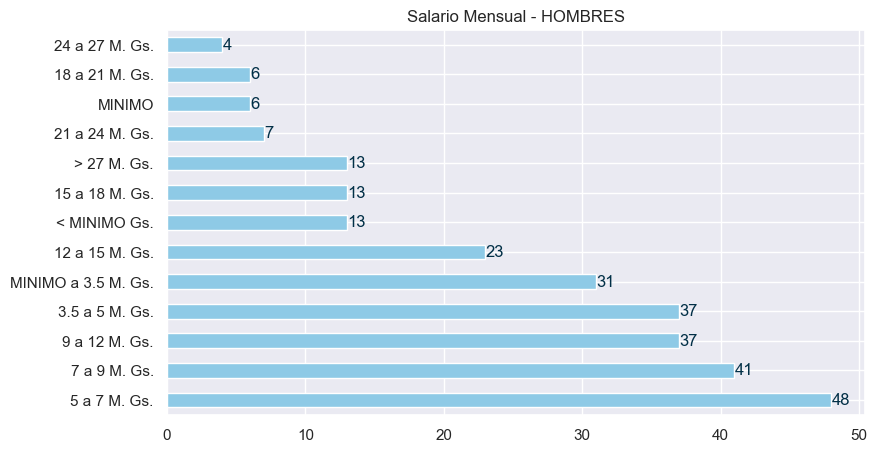

In [13]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

rects = (
    genero.get_group("HOMBRE")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(kind="barh", title="Salario Mensual - HOMBRES", color=color_hombres_light)
)


for k, v in enumerate(
    genero.get_group("HOMBRE")["salario_mensual"].value_counts(normalize=False).values
):
    rects.annotate(v, (v, k), va="center", color=color_hombres_dark)
plt.show()

### MUJERES

In [14]:
genero.get_group("MUJER")["salario_mensual"].value_counts()

5 a 7 M. Gs.           12
7 a 9 M. Gs.            8
MINIMO a 3.5 M. Gs.     7
3.5 a 5 M. Gs.          7
9 a 12 M. Gs.           7
12 a 15 M. Gs.          3
MINIMO                  2
> 27 M. Gs.             2
18 a 21 M. Gs.          1
Name: salario_mensual, dtype: int64

In [15]:
genero.get_group("MUJER")["salario_mensual"].value_counts(normalize=False).values

array([12,  8,  7,  7,  7,  3,  2,  2,  1], dtype=int64)

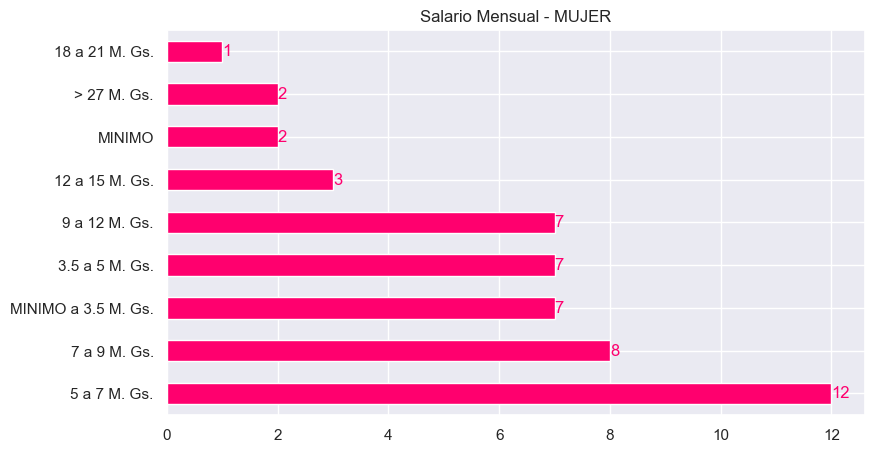

In [16]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

ret = (
    genero.get_group("MUJER")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(
        kind="barh",
        title="Salario Mensual - MUJER",
        color=color_mujeres_dark,
    )
)
for k, v in enumerate(
    genero.get_group("MUJER")["salario_mensual"].value_counts(normalize=False).values
):
    ret.annotate(v, (v, k), va="center", color=color_mujeres_dark)
plt.show()

### NO DEFINIDO

In [17]:
genero.get_group("NO COMPARTO")["salario_mensual"].value_counts()

3.5 a 5 M. Gs.         1
5 a 7 M. Gs.           1
> 27 M. Gs.            1
MINIMO a 3.5 M. Gs.    1
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
Name: salario_mensual, dtype: int64

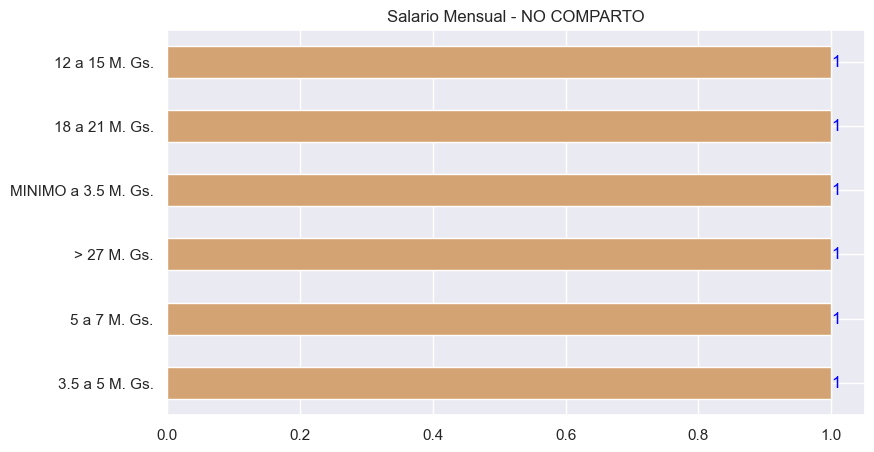

In [18]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

nc = (
    genero.get_group("NO COMPARTO")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(
        kind="barh",
        title="Salario Mensual - NO COMPARTO",
        color=color_neutro_light,
    )
)


for k, v in enumerate(
    genero.get_group("NO COMPARTO")["salario_mensual"]
    .value_counts(normalize=False)
    .values
):
    nc.annotate(v, (v, k), va="center", color="blue")
plt.show()

### GENERO HOMBRES VS MUJERES

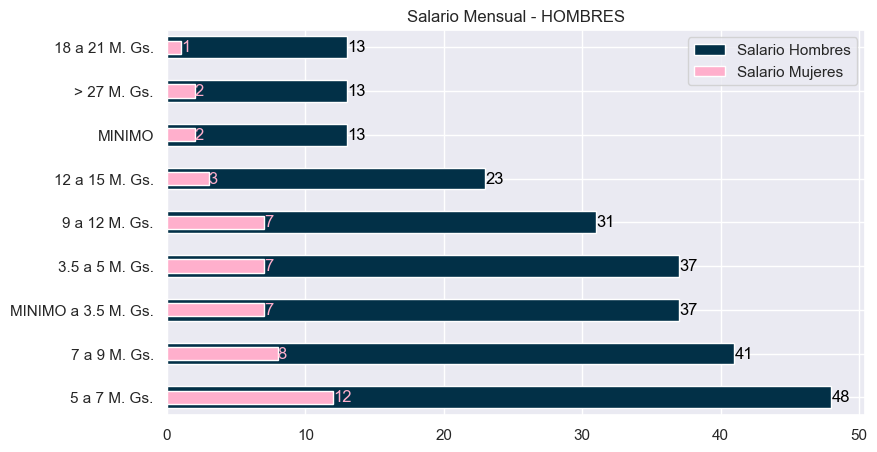

In [19]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

h = (
    genero.get_group("HOMBRE")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(
        kind="barh",
        title="Salario Mensual - HOMBRES",
        color=color_hombres_dark,
        label="Salario Hombres",
    )
)

for k, v in enumerate(
    genero.get_group("HOMBRE")["salario_mensual"].value_counts(normalize=False).values
):
    h.annotate(v, (v, k), va="center", color="black")


m = (
    genero.get_group("MUJER")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(
        kind="barh",
        title="Salario Mensual - HOMBRES",
        color=color_mujeres_light,
        width=0.3,
        label="Salario Mujeres",
    )
)

for k, v in enumerate(
    genero.get_group("MUJER")["salario_mensual"].value_counts(normalize=False).values
):
    m.annotate(v, (v, k), va="center", color=color_mujeres_light)


plt.legend()
plt.title = "SALARIO HOMBRES Y MUJERES"
plt.show()

### SALARIO  SEGUN experiencia_en_ti 

In [20]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [21]:
exp = df.groupby("exp_en_IT")

In [22]:
exp_keys = exp.groups.keys()

In [23]:
make_df(df, "exp_en_IT")

,count
cat,
<5,94
35-39,2
45-49,1
15-19,20
30-34,4
25-29,5
20-24,9
>50,1
10-14,82


<AxesSubplot: title={'center': 'Experiencia en IT'}, xlabel='count', ylabel='Años de Experiencia'>

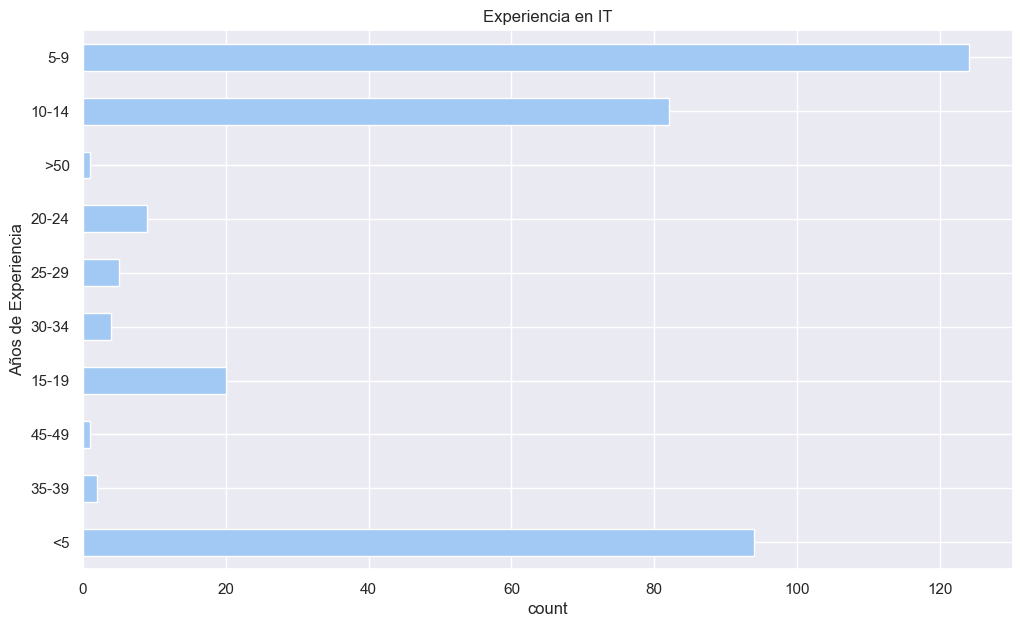

In [24]:
make_df(df, "exp_en_IT").plot(
    kind="barh",
    title="Experiencia en IT",
    ylabel="Años de Experiencia",
    xlabel="count",
    legend=False,
)

In [25]:
for i in exp_keys:
    print("Años de experiencia: ", i)
    g = exp.get_group(i)
    print(make_df(g, "salario_mensual"))
    print("\n" * 4)

Años de experiencia:  10-14
                     count
cat                       
> 27 M. Gs.              7
9 a 12 M. Gs.           18
24 a 27 M. Gs.           1
15 a 18 M. Gs.           6
MINIMO a 3.5 M. Gs.      1
18 a 21 M. Gs.           4
12 a 15 M. Gs.          15
21 a 24 M. Gs.           3
3.5 a 5 M. Gs.           6
7 a 9 M. Gs.            12
5 a 7 M. Gs.             9





Años de experiencia:  15-19
                     count
cat                       
9 a 12 M. Gs.            3
> 27 M. Gs.              1
15 a 18 M. Gs.           2
MINIMO a 3.5 M. Gs.      1
12 a 15 M. Gs.           4
3.5 a 5 M. Gs.           1
7 a 9 M. Gs.             5
5 a 7 M. Gs.             3





Años de experiencia:  20-24
                count
cat                  
> 27 M. Gs.         1
15 a 18 M. Gs.      2
12 a 15 M. Gs.      1
21 a 24 M. Gs.      1
3.5 a 5 M. Gs.      2
7 a 9 M. Gs.        1
5 a 7 M. Gs.        1





Años de experiencia:  25-29
                count
cat                  
21 a 24 M.


### SALARIO X educación



In [26]:
ed_uniques = get_column_uniques(df, "educacion")

In [27]:
for i in ed_uniques:
    print("Educacion vs. Salario : ", i)
    print("==================================")
    print(df[df["educacion"] == i]["salario_mensual"].value_counts())
    print("\n" * 5)

Educacion vs. Salario :  Ed. Secundaria
3.5 a 5 M. Gs.         4
< MINIMO Gs.           3
5 a 7 M. Gs.           2
12 a 15 M. Gs.         1
7 a 9 M. Gs.           1
MINIMO a 3.5 M. Gs.    1
Name: salario_mensual, dtype: int64






Educacion vs. Salario :  Autodidacta
MINIMO a 3.5 M. Gs.    2
Name: salario_mensual, dtype: int64






Educacion vs. Salario :  Master
12 a 15 M. Gs.         4
5 a 7 M. Gs.           3
> 27 M. Gs.            2
15 a 18 M. Gs.         2
MINIMO a 3.5 M. Gs.    2
3.5 a 5 M. Gs.         1
7 a 9 M. Gs.           1
9 a 12 M. Gs.          1
< MINIMO Gs.           1
Name: salario_mensual, dtype: int64






Educacion vs. Salario :  Doctorado
24 a 27 M. Gs.    1
Name: salario_mensual, dtype: int64






Educacion vs. Salario :  Ed. Universitaria
7 a 9 M. Gs.           32
5 a 7 M. Gs.           30
9 a 12 M. Gs.          25
3.5 a 5 M. Gs.         14
MINIMO a 3.5 M. Gs.    13
12 a 15 M. Gs.         13
MINIMO                  4
21 a 24 M. Gs.          4
15 a 18 M. Gs.   

In [28]:
ed_groups = df.groupby("educacion")

In [29]:
for i in ed_groups.groups.keys():
    s = ed_groups.get_group(i)["salario_mensual"]
    print("Educacion: [{0}], Total : {1}".format(i, s.shape[0]))
    print("=====================================")
    print(s)
    print("\n" * 3)

Educacion: [Autodidacta], Total : 2
238    MINIMO a 3.5 M. Gs.
255    MINIMO a 3.5 M. Gs.
Name: salario_mensual, dtype: object




Educacion: [Doctorado], Total : 1
257    24 a 27 M. Gs.
Name: salario_mensual, dtype: object




Educacion: [Ed. Basica;Ed. Secundaria], Total : 11
110           7 a 9 M. Gs.
115           7 a 9 M. Gs.
151    MINIMO a 3.5 M. Gs.
152           5 a 7 M. Gs.
158         18 a 21 M. Gs.
166           7 a 9 M. Gs.
170           < MINIMO Gs.
200         3.5 a 5 M. Gs.
204    MINIMO a 3.5 M. Gs.
218           5 a 7 M. Gs.
272           < MINIMO Gs.
Name: salario_mensual, dtype: object




Educacion: [Ed. Basica;Ed. Secundaria;Autodidacta], Total : 10
4           12 a 15 M. Gs.
8              > 27 M. Gs.
27     MINIMO a 3.5 M. Gs.
35          3.5 a 5 M. Gs.
41             > 27 M. Gs.
83           9 a 12 M. Gs.
176           < MINIMO Gs.
195    MINIMO a 3.5 M. Gs.
196            > 27 M. Gs.
210         3.5 a 5 M. Gs.
Name: salario_mensual, dtype: object




Educacion

### carreras_o_especialidades


In [30]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [31]:
esp = get_column_uniques(df, "carr_especialidades")

<AxesSubplot: title={'center': 'Carreras o Especialidades'}, xlabel='Total', ylabel='Carrera/Especialidad'>

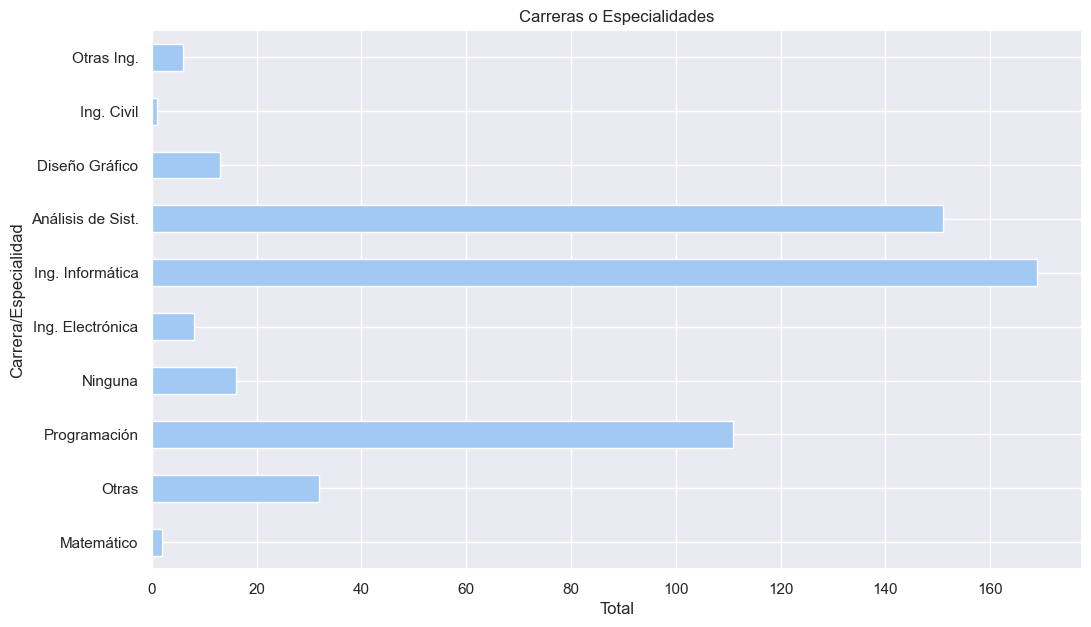

In [32]:
make_df(df, "carr_especialidades").plot(
    kind="barh",
    title="Carreras o Especialidades",
    ylabel="Carrera/Especialidad",
    xlabel="Total",
    legend=False,
)

In [33]:
esp

['Matemático',
 'Otras',
 'Programación',
 'Ninguna',
 'Ing. Electrónica',
 'Ing. Informática',
 'Análisis de Sist.',
 'Diseño Gráfico',
 'Ing. Civil',
 'Otras Ing.']

In [34]:
for i in esp:
    esp_df = df[df["carr_especialidades"].str.contains(i)]
    print("Especialidad : {0} / Total : {1}".format(i, esp_df.shape[0]))
    print("=" * 40)
    print(esp_df["salario_mensual"].value_counts())
    print("\n" * 4)

Especialidad : Matemático / Total : 2
15 a 18 M. Gs.         1
MINIMO a 3.5 M. Gs.    1
Name: salario_mensual, dtype: int64





Especialidad : Otras / Total : 32
9 a 12 M. Gs.          7
5 a 7 M. Gs.           6
3.5 a 5 M. Gs.         4
7 a 9 M. Gs.           4
MINIMO a 3.5 M. Gs.    3
21 a 24 M. Gs.         2
> 27 M. Gs.            2
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
< MINIMO Gs.           1
MINIMO                 1
Name: salario_mensual, dtype: int64





Especialidad : Programación / Total : 111
5 a 7 M. Gs.           21
3.5 a 5 M. Gs.         18
9 a 12 M. Gs.          16
MINIMO a 3.5 M. Gs.    16
7 a 9 M. Gs.           15
< MINIMO Gs.            7
12 a 15 M. Gs.          6
MINIMO                  4
21 a 24 M. Gs.          3
18 a 21 M. Gs.          2
15 a 18 M. Gs.          2
> 27 M. Gs.             1
Name: salario_mensual, dtype: int64





Especialidad : Ninguna / Total : 16
MINIMO a 3.5 M. Gs.    3
> 27 M. Gs.            2
9 a 12 M. Gs.          2
< MINIMO Gs.   

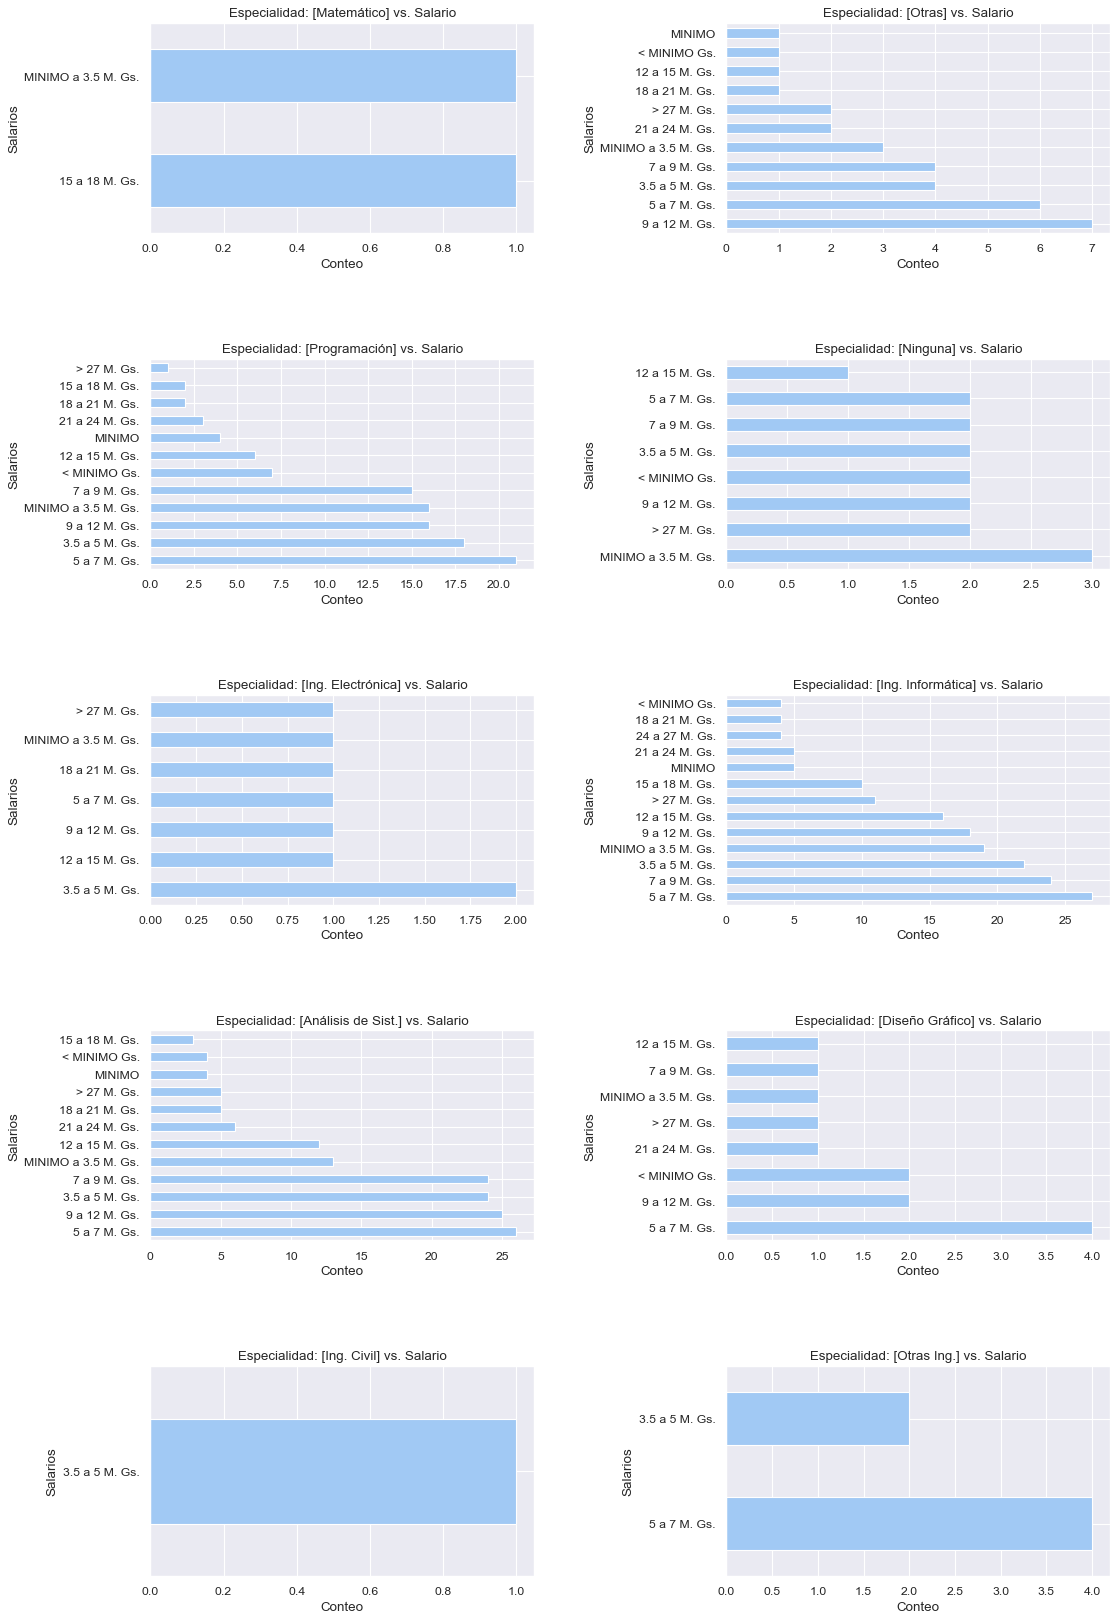

In [35]:
plt.figure(figsize=(30, 40), dpi=80)


for k, v in enumerate(esp):
    plt.subplot(8, 2, k + 1)
    aux_df = df[df["carr_especialidades"].str.contains(v)][
        "salario_mensual"
    ].value_counts(normalize=False)
    mod = aux_df.plot(
        kind="barh",
        title="Especialidad: [{0}] vs. Salario".format(v),
        legend=False,
        ylabel="Salarios",
        xlabel="Conteo",
    )


plt.subplots_adjust(left=0.6, bottom=0.1, right=1, top=0.9, wspace=0.5, hspace=0.6)

In [36]:
for k, v in enumerate(esp):
    aux_df = df[df["carr_especialidades"].str.contains(v)][
        "salario_mensual"
    ].value_counts(normalize=False)
    print("ESPECIALIDAD : ", v)
    print("=" * 20)
    print(aux_df)
    print("\n" * 3)

ESPECIALIDAD :  Matemático
15 a 18 M. Gs.         1
MINIMO a 3.5 M. Gs.    1
Name: salario_mensual, dtype: int64




ESPECIALIDAD :  Otras
9 a 12 M. Gs.          7
5 a 7 M. Gs.           6
3.5 a 5 M. Gs.         4
7 a 9 M. Gs.           4
MINIMO a 3.5 M. Gs.    3
21 a 24 M. Gs.         2
> 27 M. Gs.            2
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
< MINIMO Gs.           1
MINIMO                 1
Name: salario_mensual, dtype: int64




ESPECIALIDAD :  Programación
5 a 7 M. Gs.           21
3.5 a 5 M. Gs.         18
9 a 12 M. Gs.          16
MINIMO a 3.5 M. Gs.    16
7 a 9 M. Gs.           15
< MINIMO Gs.            7
12 a 15 M. Gs.          6
MINIMO                  4
21 a 24 M. Gs.          3
18 a 21 M. Gs.          2
15 a 18 M. Gs.          2
> 27 M. Gs.             1
Name: salario_mensual, dtype: int64




ESPECIALIDAD :  Ninguna
MINIMO a 3.5 M. Gs.    3
> 27 M. Gs.            2
9 a 12 M. Gs.          2
< MINIMO Gs.           2
3.5 a 5 M. Gs.         2
7 a 9 M. Gs.    

# Especialidad vs Años de experiencia vs salario

In [37]:
punto = df.groupby(["carr_especialidades", "exp_en_IT"])

In [38]:
for k, v in enumerate(punto.groups.keys()):
    aux_df = punto.get_group(v)["salario_mensual"].value_counts()
    print("=" * 40)
    print("Especialidad. Años de experiencia. Salarios.  / {0}".format(v))
    print("=" * 40)
    print(aux_df)
    print("\n" * 4)

Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '10-14')
12 a 15 M. Gs.    5
9 a 12 M. Gs.     4
7 a 9 M. Gs.      4
21 a 24 M. Gs.    2
5 a 7 M. Gs.      1
18 a 21 M. Gs.    1
15 a 18 M. Gs.    1
> 27 M. Gs.       1
Name: salario_mensual, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '15-19')
7 a 9 M. Gs.           2
9 a 12 M. Gs.          1
5 a 7 M. Gs.           1
MINIMO a 3.5 M. Gs.    1
Name: salario_mensual, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '20-24')
3.5 a 5 M. Gs.    1
12 a 15 M. Gs.    1
Name: salario_mensual, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '35-39')
12 a 15 M. Gs.    1
Name: salario_mensual, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '5-9')
5 a 7 M. Gs.           7
7 a 9 M. Gs.           7
9 a 12 M. Gs.          7
3.5 a 5 M. Gs.         7
MINIMO a 3.5 M. Gs.    

In [39]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [40]:
get_column_uniques(df, "tipo_de_trabajo")

['Project Lead',
 'Dev full-stack',
 'DB Admin',
 'Dev mobile',
 'Dev de sist. embebidos',
 'QA o testing',
 'Dev back-end',
 'Dev front-end',
 'Aps para Esc. o Emp.',
 'Dev de videojuegos']

In [41]:
tipo_trabajo_group = df.groupby(["tipo_de_trabajo", "exp_en_IT"])

In [42]:
t = get_column_uniques(df, "tipo_de_trabajo")

In [43]:
for i in t:
    g = df[df["tipo_de_trabajo"].str.contains(i)].groupby("exp_en_IT")
    for j in g.groups.keys():
        p = g.get_group(j)["salario_mensual"].value_counts()
        print("grupo -> ", i)
        print("años -> ", j)
        print("----------------------> \n", p)
        print("\n" * 2)

grupo ->  Project Lead
años ->  10-14
----------------------> 
 9 a 12 M. Gs.     10
12 a 15 M. Gs.     6
15 a 18 M. Gs.     3
5 a 7 M. Gs.       2
> 27 M. Gs.        2
18 a 21 M. Gs.     1
24 a 27 M. Gs.     1
Name: salario_mensual, dtype: int64



grupo ->  Project Lead
años ->  15-19
----------------------> 
 15 a 18 M. Gs.    2
9 a 12 M. Gs.     1
5 a 7 M. Gs.      1
12 a 15 M. Gs.    1
Name: salario_mensual, dtype: int64



grupo ->  Project Lead
años ->  20-24
----------------------> 
 15 a 18 M. Gs.    2
3.5 a 5 M. Gs.    1
21 a 24 M. Gs.    1
7 a 9 M. Gs.      1
12 a 15 M. Gs.    1
> 27 M. Gs.       1
Name: salario_mensual, dtype: int64



grupo ->  Project Lead
años ->  25-29
----------------------> 
 21 a 24 M. Gs.    2
9 a 12 M. Gs.     1
> 27 M. Gs.       1
5 a 7 M. Gs.      1
Name: salario_mensual, dtype: int64



grupo ->  Project Lead
años ->  30-34
----------------------> 
 < MINIMO Gs.    1
Name: salario_mensual, dtype: int64



grupo ->  Project Lead
años ->  35-39
--

In [44]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [45]:
get_column_uniques(df, "modalidad")

['Remoto', 'Hibrído', 'Ninguna', 'Presencial']

In [46]:
get_column_uniques(df, "trabajo")

['Ambas', 'Internacional', 'Nacional (Paraguay)']

# modalidad y trabajo som lo mismo?

In [47]:
df["modalidad_de_trabajo"] = df["modalidad"] + df["trabajo"]

<AxesSubplot: >

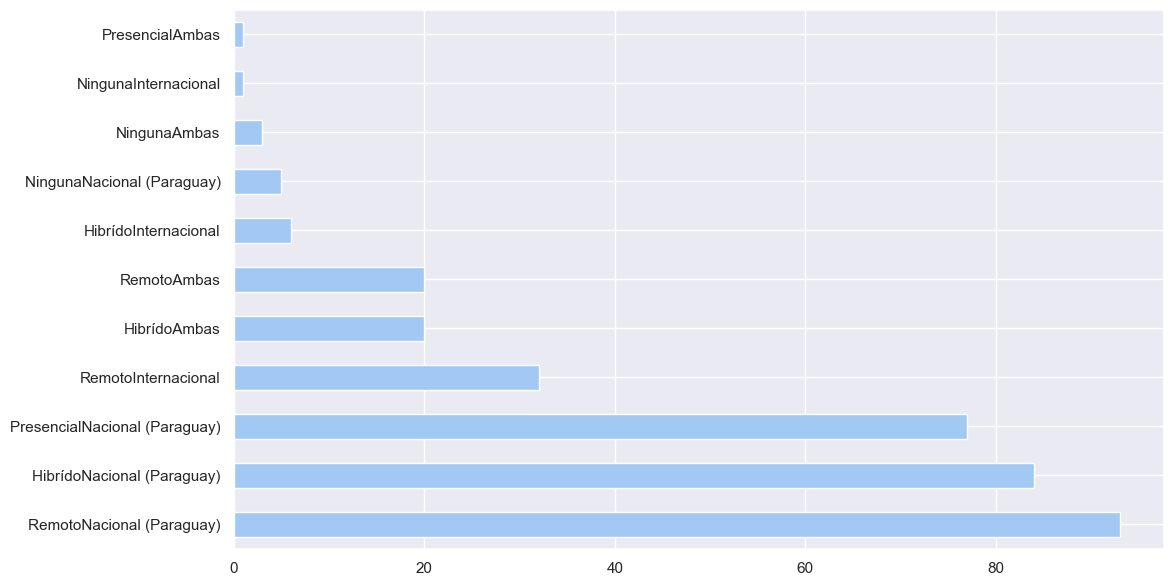

In [48]:
df["modalidad_de_trabajo"].value_counts().plot(kind="barh")

In [49]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas', 'modalidad_de_trabajo'],
      dtype='object')

In [50]:
g_modalidad = df.groupby(["modalidad_de_trabajo", "salario_mensual"])

In [51]:
for i in g_modalidad.groups:
    print("Grupo -> ", i)
    print("=" * 34)
    d = g_modalidad.get_group(i)["tipo_de_trabajo"].value_counts(normalize=False)
    print(d)
    print("\n" * 4)

Grupo ->  ('HibrídoAmbas', '12 a 15 M. Gs.')
Dev back-end                                                   1
Dev full-stack;Dev mobile;Aps para Esc. o Emp.;Project Lead    1
DB Admin                                                       1
Dev full-stack;Dev mobile;DB Admin                             1
Dev front-end                                                  1
Dev back-end;Project Lead                                      1
Name: tipo_de_trabajo, dtype: int64





Grupo ->  ('HibrídoAmbas', '15 a 18 M. Gs.')
Dev back-end;Dev front-end;Dev full-stack;QA o testing;DB Admin;Project Lead    1
Dev back-end;Dev full-stack                                                     1
Name: tipo_de_trabajo, dtype: int64





Grupo ->  ('HibrídoAmbas', '18 a 21 M. Gs.')
Dev full-stack                          1
Dev full-stack;DB Admin;Project Lead    1
Name: tipo_de_trabajo, dtype: int64





Grupo ->  ('HibrídoAmbas', '24 a 27 M. Gs.')
Project Lead    1
Name: tipo_de_trabajo, dtype: int64







In [52]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas', 'modalidad_de_trabajo'],
      dtype='object')

In [53]:
df["framworks"] = (
    df["lib_frameworks"].fillna("") + " " + df["otras_lib_frameworks"].fillna("")
)

In [54]:
fram_uniques = get_column_uniques(df, "framworks")

In [55]:
for i in fram_uniques:
    d = df[df["framworks"].str.contains(i)]
    g = d.groupby(["trabajo", "exp_en_IT"])
    for j in g.groups.keys():
        print("Framework : {0} / Salario: {1}".format(i, j))
        print("=" * 44)
        print(g.get_group(j)["salario_mensual"].value_counts())
        print("\n" * 3)

Framework : CodeIgniter React Native / Salario: ('Nacional (Paraguay)', '<5')
5 a 7 M. Gs.    1
Name: salario_mensual, dtype: int64




Framework : Vue.js Ansible / Salario: ('Nacional (Paraguay)', '<5')
5 a 7 M. Gs.    1
Name: salario_mensual, dtype: int64




Framework : Django React Native / Salario: ('Nacional (Paraguay)', '<5')
MINIMO a 3.5 M. Gs.    1
Name: salario_mensual, dtype: int64




Framework : CakePHP  / Salario: ('Ambas', '5-9')
5 a 7 M. Gs.      1
15 a 18 M. Gs.    1
Name: salario_mensual, dtype: int64




Framework : CakePHP  / Salario: ('Nacional (Paraguay)', '5-9')
9 a 12 M. Gs.     2
3.5 a 5 M. Gs.    1
7 a 9 M. Gs.      1
5 a 7 M. Gs.      1
Name: salario_mensual, dtype: int64




Framework : CakePHP  / Salario: ('Nacional (Paraguay)', '<5')
3.5 a 5 M. Gs.    1
Name: salario_mensual, dtype: int64




Framework : Angular / Salario: ('Ambas', '10-14')
12 a 15 M. Gs.    1
> 27 M. Gs.       1
21 a 24 M. Gs.    1
Name: salario_mensual, dtype: int64




Framework : Angu